# 01. Resize and Preprocessing Tests

NOTE: 3 cm x 15 cm Box to type/write the question/answer.


ORIGINAL IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->



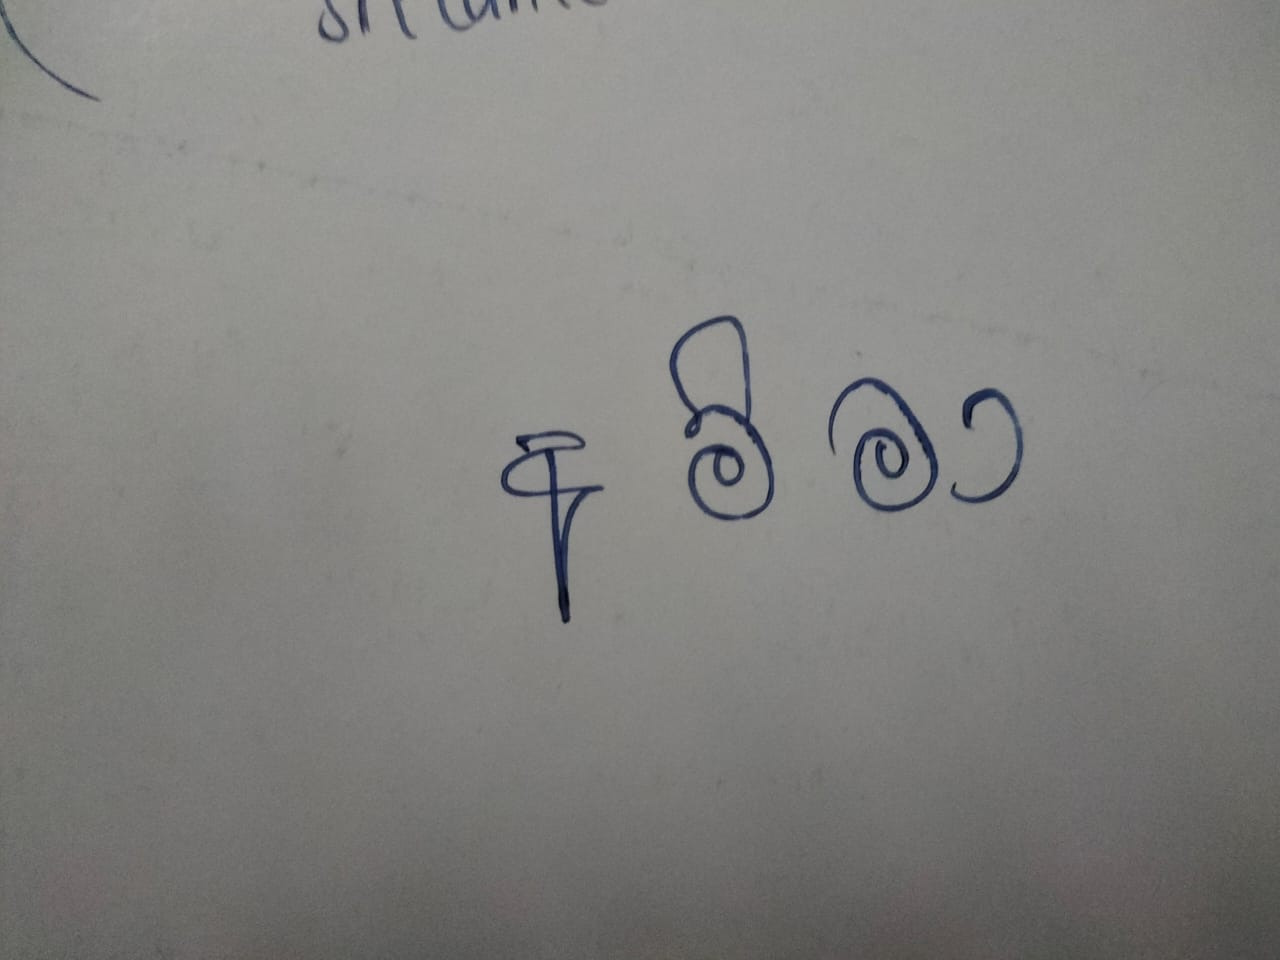

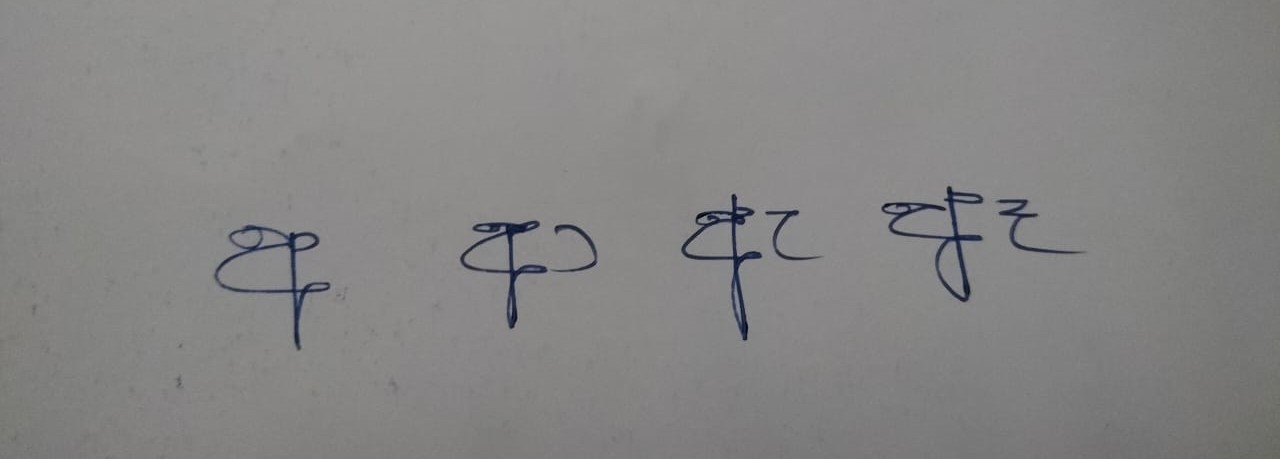

In [4]:
from IPython.display import display, Image

# Path to your image file
image1_path = 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/code/CNN/Development/SampleImages/amma.jpg'  # Replace 'example_image.jpg' with the actual filename
image2_path = 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/code/CNN/Development/SampleImages/letters.jpg'

print("\nORIGINAL IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->\n")
# Display the image
display(Image(filename=image1_path))
display(Image(filename=image2_path))

## To Crop the Images as Required

Original Image:
Cropped Image:


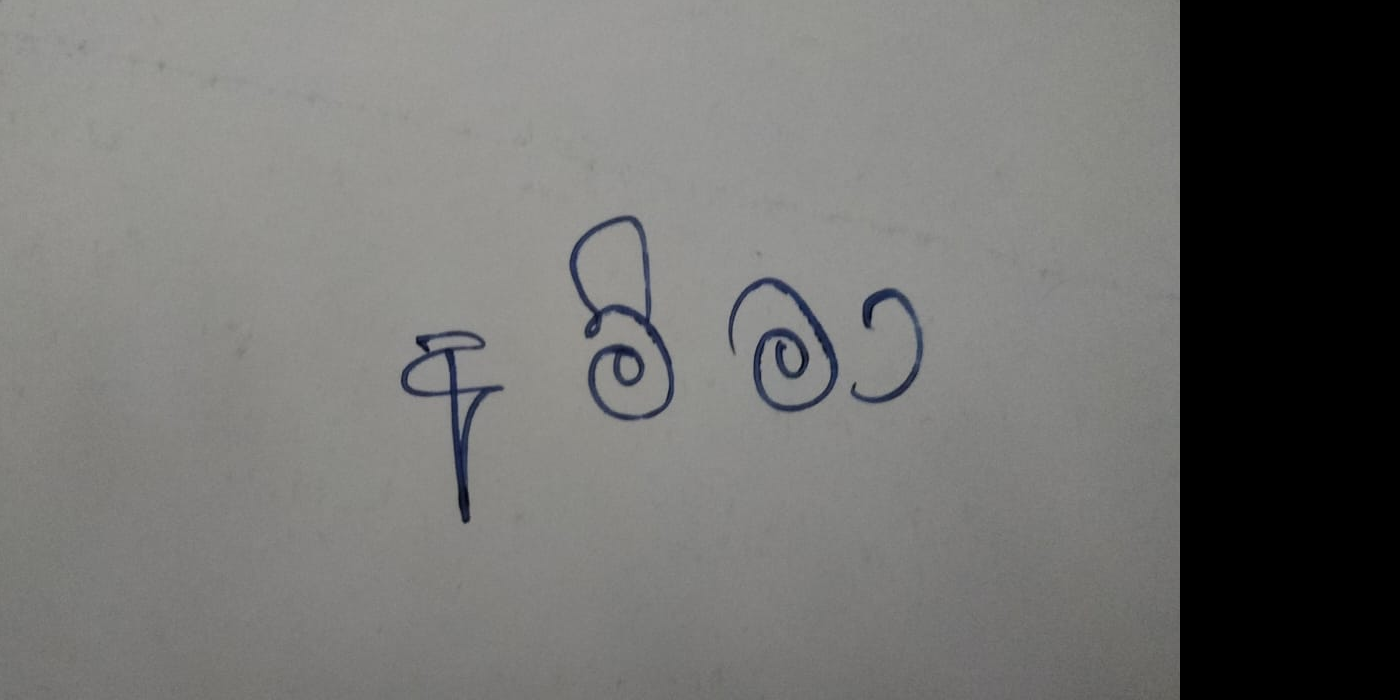

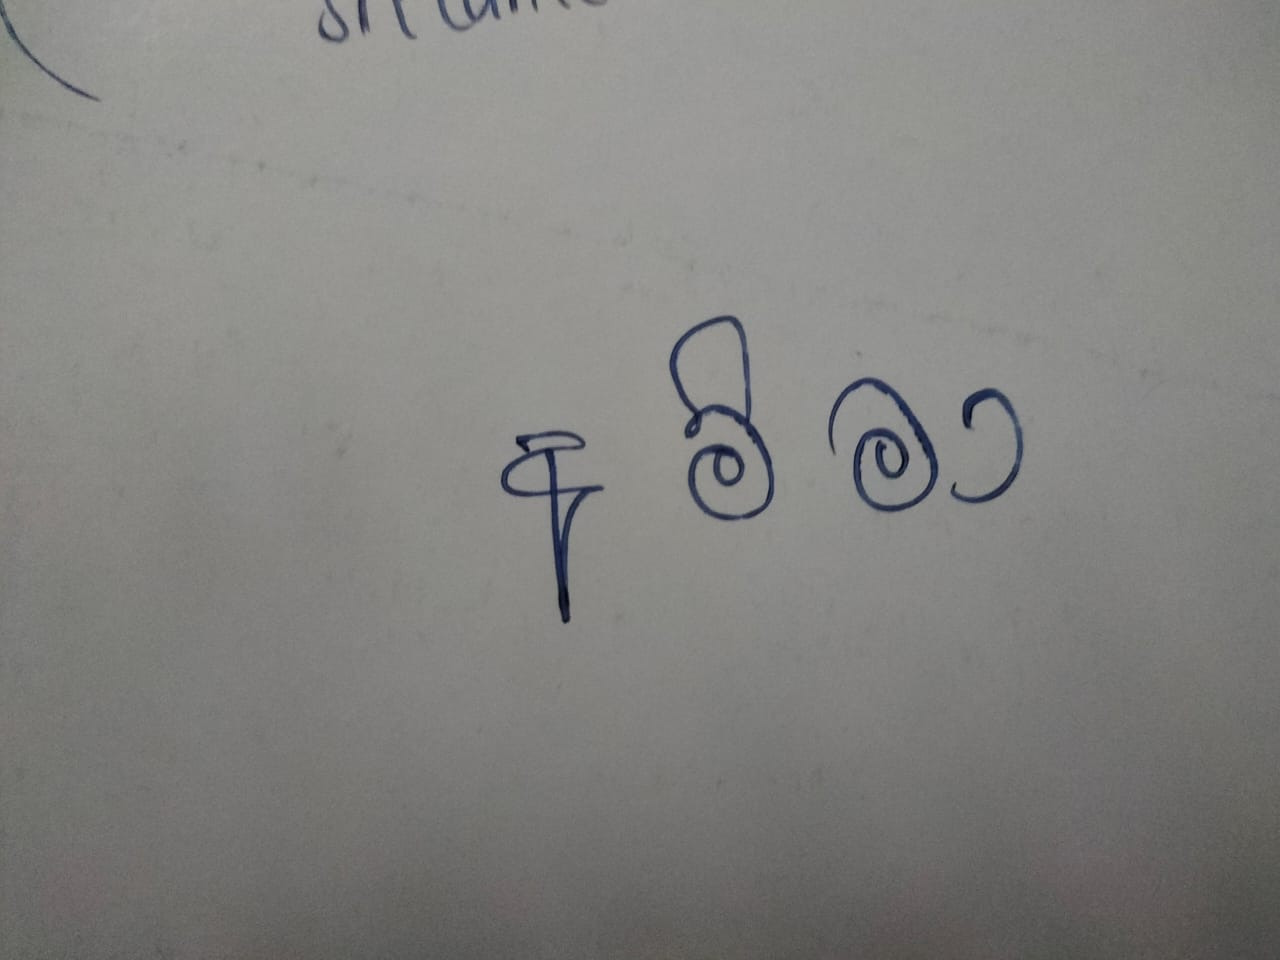

In [2]:
from PIL import Image

def crop_and_display(input_path, crop_box):
    """
    Crop an image and display both the original and cropped images.
    
    Args:
        input_path (str): Path to the input image file.
        crop_box (tuple): A tuple (left, upper, right, lower) defining the
                         pixel coordinates of the crop box.
    """
    image = Image.open(input_path)
    
    # Display original image
    print("Original Image:")
    
    # image.show()
    
    # Crop image
    cropped_image = image.crop(crop_box)
    
    # Display cropped image
    print("Cropped Image:")
    display(cropped_image)
    display(image)
    # cropped_image.show()

# Example usage:
input_path = "input_image.jpg"
crop_box = (100, 100, 1500, 800)  # (left, upper, right, lower) coordinates
crop_and_display(image1_path, crop_box)



## 1.1 Resizing the Image


RESIZED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->



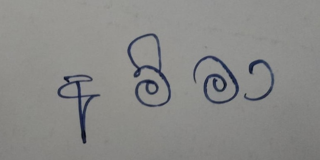

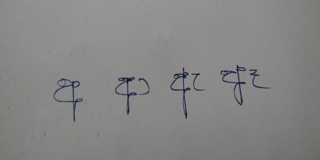

In [3]:
from PIL import Image

# Path to your original image
original_image = Image.open('amma_cropped.jpg')
original_image2 = Image.open('letters.jpg')

# Resize the img to 80x80
resized_image = original_image.resize((320,160))
resized_image2 = original_image2.resize((320,160))

print("\nRESIZED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->\n")
# Display resized img
display(resized_image)
display(resized_image2)
# [r][g][b]
# [b]

## 1.2 Converting to Grayscale


GRAYSCALE IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->



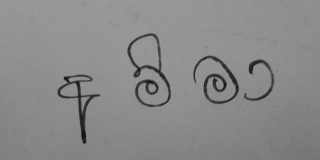

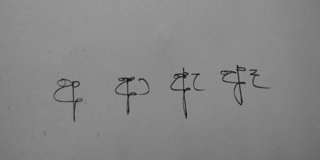

In [4]:
# Convert to grayscale image
grayscale_image = resized_image.convert('L')
grayscale_image2 = resized_image2.convert('L')

print("\nGRAYSCALE IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->\n")

# Display grayscale img
display(grayscale_image)
display(grayscale_image2)

## 1.3 Dilating Images

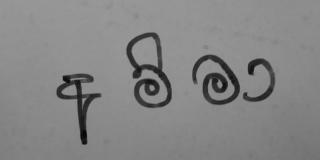

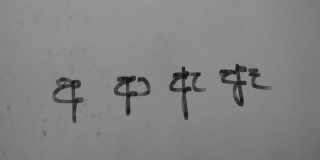

In [5]:
import numpy as np
import cv2
# Convert it to a NumPy array
binary_image_array = np.array(grayscale_image)
binary_image_array2 = np.array(grayscale_image2)

# Invert the binary image
inverted_image_array = cv2.bitwise_not(binary_image_array)
inverted_image_array2 = cv2.bitwise_not(binary_image_array2)

# Define the kernel for dilation
kernel_size = 3  # Adjust this value to control the thickness
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Perform morphological dilation
dilated_inverted_image_array = cv2.dilate(inverted_image_array, kernel, iterations=1)
dilated_inverted_image_array2 = cv2.dilate(inverted_image_array2, kernel, iterations=1)

# Invert the dilated image back to its original orientation
dilated_image_array = cv2.bitwise_not(dilated_inverted_image_array)
dilated_image_array2 = cv2.bitwise_not(dilated_inverted_image_array2)

# Convert the dilated NumPy array back to a PIL Image object
dilated_image = Image.fromarray(dilated_image_array)
dilated_image2 = Image.fromarray(dilated_image_array2)

# Display the dilated image
display(dilated_image)
display(dilated_image2)

## 1.4 Enhancing the Contrast


CONTRAST ENHANCED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->



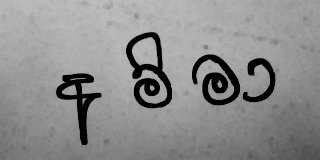

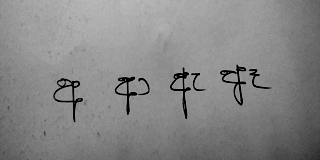

In [6]:
from PIL import ImageEnhance 

# Enhace the contrast of grayscale img
enhancer = ImageEnhance.Contrast(dilated_image)
contrast_factor = 3
contrast_enhanced_image = enhancer.enhance(contrast_factor)

enhancer = ImageEnhance.Contrast(grayscale_image2)
contrast_enhanced_image2 = enhancer.enhance(contrast_factor)

print("\nCONTRAST ENHANCED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->\n")

display(contrast_enhanced_image)
display(contrast_enhanced_image2)

## 1.5 Applying Median Blur to Images (Smoothing to Remove Background Noise)


CONTRAST ENHANCED IMAGES AFTER MEDIAN BLUR FILTER -------------------------------------------------------------------------------------------------------------------------------------------------->



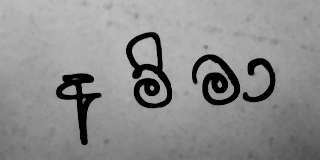

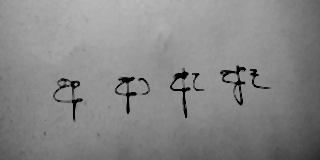

In [7]:
# Convert contrast_enhanced_image to numpy array
contrast_enhanced_image_array = np.array(contrast_enhanced_image)
contrast_enhanced_image_array2 = np.array(contrast_enhanced_image2)

# Perform median blur filtering
median_blur_kernel_size = 3  # Keep an Odd value. 
filtered_image = cv2.medianBlur(contrast_enhanced_image_array, median_blur_kernel_size)
filtered_image2 = cv2.medianBlur(contrast_enhanced_image_array2, median_blur_kernel_size)

# Convert the filtered numpy array back to a PIL Image object
filtered_image_pil = Image.fromarray(filtered_image)
filtered_image_pil2 = Image.fromarray(filtered_image2)

print("\nCONTRAST ENHANCED IMAGES AFTER MEDIAN BLUR FILTER -------------------------------------------------------------------------------------------------------------------------------------------------->\n")

# Display the contrast enhanced image after median blur filtering
display(filtered_image_pil)
display(filtered_image_pil2)

## Morphological Closing - Unsuccessful 

In [8]:
# # Convert contrast_enhanced_image to numpy array
# contrast_enhanced_image_array1 = np.array(contrast_enhanced_image)
# contrast_enhanced_image_array2 = np.array(contrast_enhanced_image2)

# # Perform morphological closing
# closing_kernel_size = 2  # Adjust this value as needed
# closing_kernel = np.ones((closing_kernel_size, closing_kernel_size), np.uint8)
# closed_image = cv2.morphologyEx(contrast_enhanced_image_array1, cv2.MORPH_CLOSE, closing_kernel, iterations=1)
# closed_image2 = cv2.morphologyEx(contrast_enhanced_image_array2, cv2.MORPH_CLOSE, closing_kernel, iterations=1)

# # Convert the closed numpy array back to a PIL Image object
# closed_image_pil = Image.fromarray(closed_image)
# closed_image_pil2 = Image.fromarray(closed_image2)

# print("\nCONTRAST ENHANCED IMAGES AFTER MORPHOLOGICAL CLOSING -------------------------------------------------------------------------------------------------------------------------------------------------->\n")

# # Display the contrast enhanced image after morphological closing
# display(closed_image_pil)
# display(closed_image_pil2)

In [9]:
# # Convert contrast_enhanced_image to numpy array
# contrast_enhanced_image_array = np.array(contrast_enhanced_image)

# # Perform median blur filtering
# median_blur_kernel_size = 5  # Adjust this value as needed
# filtered_image = cv2.medianBlur(contrast_enhanced_image_array, median_blur_kernel_size)

# # Convert the filtered numpy array back to a PIL Image object
# filtered_image_pil = Image.fromarray(filtered_image)

# print("\nCONTRAST ENHANCED IMAGES AFTER MEDIAN BLUR FILTER -------------------------------------------------------------------------------------------------------------------------------------------------->\n")

# # Display the contrast enhanced image after median blur filtering
# display(filtered_image_pil)

## Morphalogical Opening - Unsuccessful

In [10]:
# # Convert contrast_enhanced_image to numpy array
# contrast_enhanced_image_array = np.array(filtered_image_pil)
# contrast_enhanced_image_array2 = np.array(contrast_enhanced_image2)

# # Perform morphological opening
# kernel_size = 3  # Adjust this value as needed
# kernel = np.ones((kernel_size, kernel_size), np.uint8)
# opened_image = cv2.morphologyEx(contrast_enhanced_image_array, cv2.MORPH_OPEN, kernel, iterations=2)
# opened_image2 = cv2.morphologyEx(contrast_enhanced_image_array2, cv2.MORPH_OPEN, kernel, iterations=2)

# # Convert the opened numpy array back to a PIL Image object
# opened_image_pil = Image.fromarray(opened_image)
# opened_image_pil2 = Image.fromarray(opened_image2)

# print("\nCONTRAST ENHANCED IMAGES AFTER MORPHOLOGICAL OPENING -------------------------------------------------------------------------------------------------------------------------------------------------->\n")

# # Display the contrast enhanced image after morphological opening
# display(opened_image_pil)
# display(opened_image_pil2)

## 1.6 Binarizing the Images


BINARIZED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->



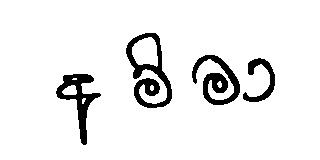

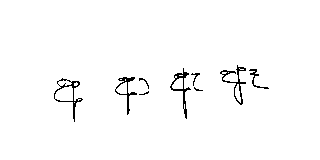

In [9]:
import cv2 
import numpy as np

# Convert to numpy array
contrast_enhanced_image_array = np.array(filtered_image_pil)
contrast_enhanced_image_array2 = np.array(contrast_enhanced_image2)

# Perform thresholding to binarize the image
threshold_value = 40
_, binary_image_array = cv2.threshold(contrast_enhanced_image_array, threshold_value, 255, cv2.THRESH_BINARY)
_, binary_image_array2 = cv2.threshold(contrast_enhanced_image_array2, threshold_value, 255, cv2.THRESH_BINARY)

# Convert the binary NumPy array back to a PIL Image Obj
binary_image = Image.fromarray(binary_image_array)
binary_image2 = Image.fromarray(binary_image_array2)

print("\nBINARIZED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->\n")

# Display binary image
display(binary_image)
display(binary_image2)

## 1.7 Dilating the Images

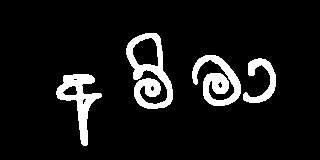

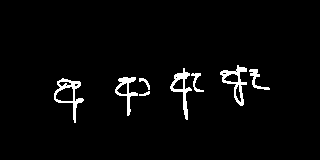

In [10]:
# Convert it to a NumPy array
binary_image_array = np.array(binary_image)
binary_image_array2 = np.array(binary_image2)

# Invert the binary image
inverted_image_array = cv2.bitwise_not(binary_image_array)
inverted_image_array2 = cv2.bitwise_not(binary_image_array2)

# Define the kernel for dilation
kernel_size = 2  # Adjust this value to control the thickness
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Perform morphological dilation
dilated_inverted_image_array = cv2.dilate(inverted_image_array, kernel, iterations=1)
dilated_inverted_image_array2 = cv2.dilate(inverted_image_array2, kernel, iterations=1)

# Invert the dilated image back to its original orientation
# dilated_image_array = cv2.bitwise_not(dilated_inverted_image_array)

# Convert the dilated NumPy array back to a PIL Image object
dilated_image = Image.fromarray(dilated_inverted_image_array)
dilated_image2 = Image.fromarray(dilated_inverted_image_array2)

# Display the dilated image
display(dilated_image)
display(dilated_image2)

## 1.8 Text Localization and Mounting Bounding Boxes

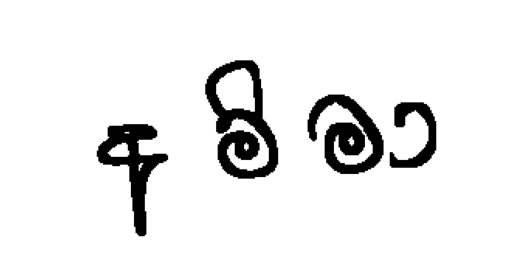

In [11]:
from matplotlib import pyplot as plt

# Converting dilated img to numpy array
dilated_image_array = np.array(dilated_image)

# Find contours in the binary image
contours, _ = cv2.findContours(dilated_image_array, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area to remove noise
min_area = 1
max_area = 1000
filtered_contours = [cnt for cnt in contours if min_area < cv2.contourArea(cnt) < max_area]

# Get bounding boxes for each contour
bounding_boxes = [cv2.boundingRect(cnt) for cnt in filtered_contours]

# Getting bounding boxes on the original image
for x, y, w, h in bounding_boxes:
    cv2.rectangle(dilated_image_array, (x, y), (x + w, y + h), (0, 255, 0), 2)

dilated_inverted_image_array = cv2.bitwise_not(dilated_image_array)

# Convert the openCV image to PIL format
image_pil = Image.fromarray(cv2.cvtColor(dilated_inverted_image_array,cv2.COLOR_BGR2RGB))

# Display the image using Matplotlib
plt.imshow(image_pil)
plt.axis('off')  # Hide axis
plt.show()

As observed above, downsizing the image and then mounting the bounding boxes failed (Lack of pixels for the bounding box to appear). Hence, text localization will be attempted prior to downsizing. 

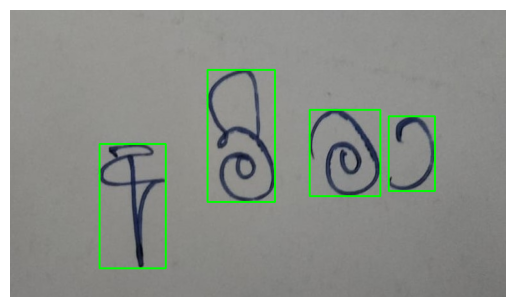

In [12]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('amma_cropped.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to obtain a binary image
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area to remove noise
min_area = 1000
max_area = 10000
filtered_contours = [cnt for cnt in contours if min_area < cv2.contourArea(cnt) < max_area]

# Get bounding boxes for each contour
bounding_boxes = [cv2.boundingRect(cnt) for cnt in filtered_contours]

# Draw bounding boxes on the original image
for x, y, w, h in bounding_boxes:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Convert the OpenCV image to PIL format
image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Display the image using Matplotlib
plt.imshow(image_pil)
plt.axis('off')  # Hide axis
plt.show()


Successful!

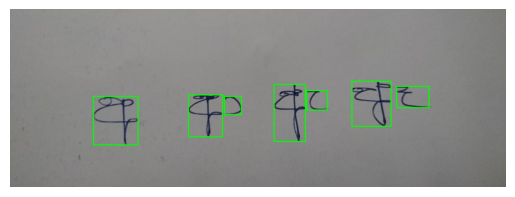

In [13]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('letters.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to obtain a binary image
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area to remove noise
min_area = 100
max_area = 10000
filtered_contours = [cnt for cnt in contours if min_area < cv2.contourArea(cnt) < max_area]

# Get bounding boxes for each contour
bounding_boxes = [cv2.boundingRect(cnt) for cnt in filtered_contours]

# Draw bounding boxes on the original image
for x, y, w, h in bounding_boxes:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Convert the OpenCV image to PIL format
image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Display the image using Matplotlib
plt.imshow(image_pil)
plt.axis('off')  # Hide axis
plt.show()

Successful!!

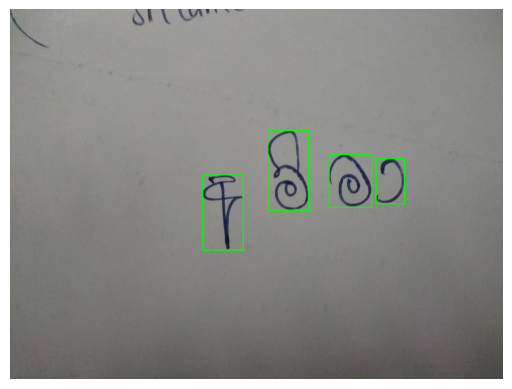

In [14]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('amma.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to obtain a binary image
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area to remove noise
min_area = 1000
max_area = 10000
filtered_contours = [cnt for cnt in contours if min_area < cv2.contourArea(cnt) < max_area]

# Get bounding boxes for each contour
bounding_boxes = [cv2.boundingRect(cnt) for cnt in filtered_contours]

# Draw bounding boxes on the original image
for x, y, w, h in bounding_boxes:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Convert the OpenCV image to PIL format
image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Display the image using Matplotlib
plt.imshow(image_pil)
plt.axis('off')  # Hide axis
plt.show()

Successful!!!

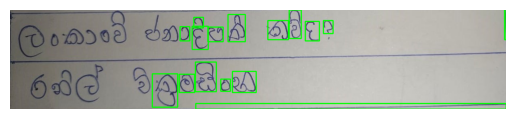

In [15]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('SampleQ.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to obtain a binary image
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area to remove noise
min_area = 100
max_area = 10000
filtered_contours = [cnt for cnt in contours if min_area < cv2.contourArea(cnt) < max_area]

# Get bounding boxes for each contour
bounding_boxes = [cv2.boundingRect(cnt) for cnt in filtered_contours]

# Draw bounding boxes on the original image
for x, y, w, h in bounding_boxes:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Convert the OpenCV image to PIL format
image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Display the image using Matplotlib
plt.imshow(image_pil)
plt.axis('off')  # Hide axis
plt.show()

### UNSUCCESSFUL! LACK OF LIGHTING. 
### Attempt:
01. Noise removal
02. Increase in contrast
03. Draw bounding boxes

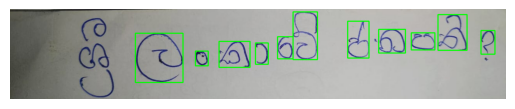

In [16]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('SampleQ3.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to obtain a binary image
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area to remove noise
min_area = 300
max_area = 10000
filtered_contours = [cnt for cnt in contours if min_area < cv2.contourArea(cnt) < max_area]

# Get bounding boxes for each contour
bounding_boxes = [cv2.boundingRect(cnt) for cnt in filtered_contours]
[]
# Draw bounding boxes on the original image
for x, y, w, h in bounding_boxes:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Convert the OpenCV image to PIL format
image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Display the image using Matplotlib
plt.imshow(image_pil)
plt.axis('off')  # Hide axis
plt.show()

UNSUCCESSFUL! LACK OF LIGHTING.

# 02 CNN to Recognize the Handwritten Sinhala Letters.
# Unit Tests After Here

## 2.1 Defining the CNN Architecture:

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Check for NumPy version compatibility
if not hasattr(np, 'complex_'):
    np.complex_ = np.complex128

# Defining the CNN architecture.
def create_sinhala_letter_id_cnn():
    model = models.Sequential([
        layers.Input(shape=(80, 80, 1)),  # Input layer with specified shape
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(454, activation='softmax')  # Assuming 454 labels.
    ])
    return model

# Create an instance of the CNN.
sinhala_letter_cnn = create_sinhala_letter_id_cnn()

# Compile the model.
sinhala_letter_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary.
sinhala_letter_cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 78, 78, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,048,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 454)            │        29,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,133,894 (4.33 MB)

 Trainable params: 1,133,894 (4.33 MB)

 Non-trainable params: 0 (0.00 B)

## 2.2 Function to Map Each Integer Class Label to the Corresponding Sinhala Character:

In [1]:
def map_classes_to_sinhala_letters(class_labels):
    
    # NOTE: 
    # - Need to take some samples to represent a space between words. 
    # - Need to add some letter samples from the person we will be testing the systems on.
    # - උ missing. Might be needed. 
    # - combuwa + letter cobinations are missing. Add those. 
    # - Discuss the letters to be removed (Never used letters are there).
    # - Discuss missing but essential letters. 
    # - Add a dataset for space between words.
    # - Remove the unneccessary labels. 
    
    # Define a dictionary, mapping class labels to Sinhala letters.
    class_to_letter = {
        1: 'අ', 2: 'ආ', 3: 'ඇ', 4: 'ඈ', 5: 'ඉ', 6: 'ඊ', 7: 'උ', 8: 'එ', 9: 'ඒ', 
        10: 'ඔ', 11: 'ඕ', 12: 'ක', 13: 'කා', 14: 'කැ', 15: 'කෑ', 16: 'කි', 17: 'කී', 18: 'කු', 19: 'කූ',
        20: 'ක්', 21: 'කෝ', 22: 'ක්‍ර', 23: 'ක්‍රි', 24: 'ක්‍රී', 25: 'ග', 26: 'ගා', 27: 'ගැ ', 28: 'ගෑ', 29: 'ගි',
        30: 'ගී', 31: 'ගු', 32: 'ගූ', 33: 'ග්', 34: 'ගෝ', 35: 'ග්‍ර', 36: 'ග්‍රි', 37: 'ග්‍රී', 38: 'ච', 39: 'චා',
        40: 'චැ', 41: 'චෑ', 42: 'චි', 43: 'චී', 44: 'චු', 45: 'චූ', 46: 'ච්', 47: 'චෝ', 48: 'චු', 49: 'ච්‍ර', # 48 - චු and 49 - ච්‍ර weird in the dataset!!!
        50: 'ච්‍රී', 51: 'ජ', 52: 'ජා', 53: 'ජැ', 54: 'ජෑ', 55: 'ජි', 56: 'ජී', 57: 'ජු', 58: 'ජූ', 59: 'ජ්',
        60: 'ජෝ', 61: 'ජ්‍ර', 62: 'ජ්‍රි', 63: 'ජ්‍රී', 64: 'ට', 65: 'ටා', 66: 'ටැ', 67: 'ටෑ', 68: 'ටි', 69: 'ටී',
        70: 'ටු', 71: 'ටූ', 72: 'ට්', 73: 'ටෝ', 74: 'ට්‍ර', 75: 'ට්‍රි', 76: 'ට්‍රි', 77: 'ඩ', 78: 'ඩා', 79: 'ඩැ',
        80: 'ඩෑ', 81: 'ඩි', 82: 'ඩී', 83: 'ඩු', 84: 'ඩූ', 85: 'ඩ්', 86: 'ඩෝ', 87: 'ඩු', 88: 'ඩ්‍රි', 89: 'ඩ්‍රි',
        90: 'ණ', 91: 'ණා', 92: 'ණි', 93: 'ත', 94: 'තා', 95: 'ති', 96: 'තී', 97: 'තු', 98: 'තූ', 99: 'ත්',
        100: 'තෝ', 101: 'ත්‍ර', 102: 'ත්‍රා', 103: 'ත්‍රි', 104: 'ත්‍රී', 105: 'ද', 106: 'දා', 107: 'දැ', 108: 'දෑ', 109: 'දි',
        110: 'දී', 111: 'දු', 112: 'දූ', 113: 'ද්', 114: 'දෝ', 115: 'ද්‍ර', 116: 'ද්‍රෝ', 117: 'ද්‍රා', 118: 'ද්‍රි', 119: 'ද්‍රී',
        120: 'න', 121: 'නා', 122: 'නැ', 123: 'නෑ', 124: 'නි', 125: 'නී', 126: 'නු', 127: 'නූ', 128: 'න්', 129: 'නෝ',
        130: 'න්‍ර', 131: 'න්‍රා', 132: 'න්‍රි', 133: 'න්‍රී', 134: 'ප', 135: 'පා', 136: 'පැ', 137: 'පෑ', 138: 'පි', 139: 'පී',
        140: 'පු', 141: 'පූ', 142: 'ප්', 143: 'ප්‍රෝ', 144: 'පෝ', 145: 'ප්‍ර', 146: 'ප්‍රා', 147: 'ප්‍රි', 148: 'ප්‍රී', 149: 'බ',
        150: 'බා', 151: 'බැ', 152: 'බෑ', 153: 'බි', 154: 'බී', 155: 'බු', 156: 'බූ', 157: 'බ්', 158: 'බෝ', 159: 'බ්‍ර',
        160: 'බ්‍රා', 161: 'බ්‍රි', 162: 'බ්‍රී', 163: 'බ්‍රෝ', 164: 'ම', 165: 'මා', 166: 'මැ', 167: 'මෑ', 168: 'මි', 169: 'මී',
        170: 'මු', 171: 'මූ', 172: 'ම්', 173: 'මෝ', 174: 'ම්‍ර', 175: 'ම්‍රා', 176: 'ම්‍රි', 177: 'ම්‍රී', 178: 'ම්‍රෝ', 179: 'ය',
        180: 'යා', 181: 'යැ', 182: 'යෑ', 183: 'යි', 184: 'යී', 185: 'යු', 186: 'යූ', 187: '', 188: 'ය්', 189: 'යෝ', # Rectify 187 data samples here to යෝ, I assume. (Or remove)
        190: 'ර', 191: 'රා', 192: 'රැ', 193: 'රෑ', 194: 'රු', 195: 'රූ', 196: 'රි', 197: 'රී', 198: 'ල', 199: 'ලා',
        200: 'ලැ', 201: 'ලෑ', 202: 'ලි', 203: 'ලී', 204: 'ලු', 205: 'ලූ', 206: 'ල්', 207: 'ලෝ', 208: 'ව', 209: 'වා',
        210: 'වැ', 211: 'වෑ', 212: 'වි', 213: 'වී', 214: 'වු', 215: 'වූ', 216: 'ව්', 217: 'වෝ', 218: 'ව්‍ර', 219: 'ව්‍රා',
        220: 'ව්‍රැ', 221: 'ව්‍රැෑ', 222: 'ව්‍රෝ', 223: 'ශ', 224: 'ශා', 225: 'ශැ', 226: 'ශෑ', 227: 'ශි', 228: 'ශී', 229: 'ශු',
        230: 'ශූ', 231: 'ශ්', 232: 'ශෝ', 233: 'ශ්‍ර', 234: 'ශ්‍රා', 235: 'ශ්‍රැ', 236: 'ශ්‍රෑ', 237: 'ශ්‍රි', 238: 'ශ්‍රී', 239: 'ශ්‍රෝ',
        240: 'ෂ', 241: 'ෂා', 242: 'ෂැ', 243: 'ෂෑ', 244: 'ෂි', 245: 'ෂී', 246: 'ෂු', 247: 'ෂූ', 248: 'ෂ්', 249: 'ෂ්‍රෝ',
        250: 'ස', 251: 'සා', 252: 'සැ', 253: 'සෑ', 254: 'සි', 255: 'සී', 256: 'සු', 257: 'සූ', 258: 'සෝ', 259: 'ස්‍ර', # Start from this line onwards. 
        260: 'ස්‍රා', 261: 'ස්‍රි', 262: 'ස්‍රී', 263: 'ස්‍', 264: 'හ', 265: 'හා', 266: 'හැ', 267: 'හෑ', 268: 'හි', 269: 'හී',
        270: 'හු', 271: 'හූ', 272: 'හ්', 273: 'හෝ', 274: 'ළ', 275: 'ළා', 276: 'ළැ', 277: 'ළෑ', 278: 'ළි', 279: 'ළී',
        280: 'ළූ', 281: 'ළූ', 282: 'ෆ', 283: 'ෆා', 284: 'ෆැ', 285: 'ෆෑ', 286: 'ෆි', 287: 'ෆී', 288: 'ෆු', 289: 'ෆූ',
        290: 'ෆ්‍ර', 291: 'ෆ්‍රි', 292: 'ෆ්‍රී', 293: 'ෆැ', 294: 'ෆෑ', 295: 'ෆ්', 296: 'ෆෝ', 297: 'ක්‍රා', 298: 'ක්‍රැ', 299: 'ක්‍රෑ', 
        300: 'ක්‍රෝ', 301: 'ග්‍රෝ', 302: 'ඛ', 303: 'ඛා', 304: 'ඛි', 305: 'ඛී', 306: 'ඛ්', 307: 'ඝ', 308: 'ඝා', 309: 'ඝැ',
        310: 'ඝෑ', 311: 'ඝි', 312: 'ඝී', 313: 'ඝු', 314: 'ඝූ', 315: 'ඝෝ', 316: 'ඝ්', 317: 'ඝ්‍ර', 318: 'ඝ්‍රා', 319: 'ඝ්‍රි',
        320: 'ඝ්‍රී', 321: 'ඳ', 322: 'ඳා', 323: 'ඳැ', 324: 'ඳෑ', 325: 'ද', 326: 'ඳි', 327: 'ඳී', 328: 'ඳු', 329: 'ඳූ',
        330: 'ඳෝ', 331: 'ඳ්', 332: 'ඟ', 333: 'ඟා', 334: 'ඟැ', 335: 'ඟෑ', 336: 'ඟි', 337: 'ඟී', 338: 'ඟු', 339: 'ඟූ',
        340: 'ඟෝ', 341: 'ඟ්', 342: 'ඩ', 343: 'ැ', 344: 'ඩා', 345: 'ඩැ', 346: 'ඩෑ', 347: 'ඩි', 348: 'ඩී', 349: 'ඩු', # Should be sanyaka ඩ (But we will use ඩ here). 
        350: 'ඩූ', 351: 'ඩෝ', 352: 'ඩ්', 353: 'ඹ', 354: 'ඹා', 355: 'ඹැ', 356: 'ඹෑ', 357: 'ඹි', 358: 'ඹී', 359: 'ඹු',
        360: 'ඹූ', 361: 'ඹෝ', 362: 'ඹ්', 363: 'භ', 364: 'භා', 365: 'භැ', 366: 'භෑ', 367: 'භි', 368: 'භී', 369: 'භු',
        370: 'භූ', 371: 'භෝ', 372: 'භ්', 373: 'ධ', 374: 'ධා', 375: 'ධැ', 376: 'ධෑ', 377: 'ධි', 378: 'ධී', 379: 'ධු',
        380: 'ධූ', 381: 'ධෝ', 382: 'ධ්', 383: 'ඨ', 384: 'ඨා', 385: 'ඨැ', 386: 'ඨෑ', 387: 'ඨි', 388: 'ඨු', 389: 'ඨූ',
        390: 'ඨ්', 391: 'ඪ', 392: 'ඪා', 393: 'ඪි', 394: 'ඪෝ', 395: 'ඵ', 396: 'ඵා', 397: 'ඵු', 398: 'ඵි', 399: 'ඵෝ',
        400: 'ඵ්', 401: 'ථ', 402: 'ථා', 403: 'ථැ', 404: 'ථ්', 405: 'ා', 406: 'ෟ', 407: 'ණැ', 408: 'ණෑ', 409: 'ෘ',
        410: 'ණී', 411: 'ණු', 412: 'ණූ', 413: 'ණෝ', 414: 'ණ්', 415: 'ඥ', 416: 'ඥා', 417: 'ඥෝ', 418: 'ඤ', 419: 'ඤා',
        420: 'ඤු', 421: 'ඤෝ', 422: 'ඤ්', 423: 'ඣ', 424: 'ඣා', 425: 'ඣු', 426: 'ඣෝ', 427: 'ඣ්', 428: 'ජ', 429: 'ජා',
        430: 'ජැ', 431: 'ජෑ', 432: 'ජි', 433: 'ජු', 434: 'ජූ', 435: 'ජෝ', 436: 'ජ්', 437: 'ඡ', 438: 'ඡා', 439: 'ඡැ',
        440: 'ඡෑ', 441: 'ඡි', 442: 'ඡේ', 443: 'තැ', 444: 'තෑ', 445: 'ත්‍රැ', 446: 'ත්‍රෑ', 447: 'ත්‍රෝ', 448: 'ළු', 449: 'ෲ',
        450: '', 451: 'ෛ', 452: ' ෙ', 453: '?', 454: '', # 450, 453, 454 not used. (Can't find the yansaya character and also need the binduwa  ං )
    }
    
    # Initialize an empty list to store Sinhala letters
    sinhala_letters = []
    
    # Iterate over each class label and map it to the corresponding Sinhala letter
    for label in class_labels:
        # Check if the label is in the mapping dictionary
        if label in class_to_letter:
            # Append the corresponding Sinhala letter to the list
            sinhala_letters.append(class_to_letter[label])
        else:
            # If the label is not found in the mapping dictionary, append a placeholder
            sinhala_letters.append('Unknown')
    
    return sinhala_letters

In [2]:
list = [1, 172, 165]
listfinal = map_classes_to_sinhala_letters(list)
print(listfinal)

['අ', 'ම්', 'මා']


## 2.3 Google Translator API

In [4]:
import os
from google.cloud import translate_v2

# Ref Video : https://www.youtube.com/watch?v=upzqd5Sok_o 

# Configuring and initializing the google translation api client. 
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r"../../googlekey.json"
translate_client = translate_v2.Client()

# Dummy text string defined for unit testing purposes. 
text = "ඇමරිකා එක්සත් ජනපදයේ පළමු ප්‍රජාතන්ත්‍රවාදී ජනාධිපතිවරයා කවුද?"

# Concatenating the contents of the iterable to a single String. 
text2 = "".join(listfinal) 

# Language to which the input should be translated to. 
target = 'en'

# The translated output is accessed via the 'output' variable. 
output = translate_client.translate(text, target_language = target)

print("Result:")
print()
print(output)
print()
print(output['translatedText'])

Forbidden: 403 POST https://translation.googleapis.com/language/translate/v2?prettyPrint=false: User Rate Limit Exceeded

## 2.4 Loading the roberta-base-squad2 Model and Performing Question Answering Tasks

In [ ]:
# Install the following dependencies beforehand
# Instal PyTorch            : conda install pytorch torchvision torchaudio cpuonly -c pytorch
# Install Transformer       : pip install transformers

# Ref Video                 : https://www.youtube.com/watch?v=lPKEOAnMppw 
# Ref Video                 : https://www.youtube.com/watch?v=DNRiUGtKlVU
# Doc roberta-base-squad2   : https://huggingface.co/deepset/roberta-base-squad2
# Doc gpt-j-6b              : https://huggingface.co/EleutherAI/gpt-j-6b
# OpenAI Billing Scheme     : https://openai.com/pricing

from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline
import os

# To disable the symlinks warning
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

# Specifying the transformer considered from those in Hugging-Face Serverless Inference APIs
model_name = "deepset/roberta-base-squad2"

# Create a question answering pipeline and get predictions
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)

# Arranging the QnA in a dictionary to be fed into the pipeline
QA_input = {
    'question': 'What are cars designed for?',
    'context': "Cars are vehicles designed for the transportation of people and goods, typically powered by internal combustion engines or electric motors. They provide individuals with a convenient and flexible mode of transportation, offering mobility and independence. With advancements in technology, modern cars are becoming increasingly efficient, safer, and more environmentally friendly."
}

# Retreaving the response from the pipeline
res = nlp(QA_input)

# b) Load the pre-trained model and the tokenizer
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

print("Results:-")
print()
print(f"Answer: {res['answer']}")
print()
print(res)

Results:-

Answer: transportation of people and goods

{'score': 0.6447138786315918, 'start': 35, 'end': 69, 'answer': 'transportation of people and goods'}


## 2.5 Attempting to Load gpt-j-6b Translator Pipeline - UNSUCCESSFUL (LACK OF CPU RAM - 40 GB MINIMUM NEEDED)

In [ ]:
# Ref Video: https://www.youtube.com/watch?v=bLMbnHunL_E 
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-j-6B")
model = AutoModelForCausalLM.from_pretrained("EleutherAI/gpt-j-6B")

tokenizer_config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

C:\Users\cmsmc\anaconda3\envs\sinhala_translator\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\cmsmc\.cache\huggingface\hub\models--EleutherAI--gpt-j-6B. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/930 [00:00<?, ?B/s]

C:\Users\cmsmc\anaconda3\envs\sinhala_translator\lib\site-packages\huggingface_hub\file_download.py:1003: UserWarning: Not enough free disk space to download the file. The expected file size is: 24207.82 MB. The target location C:\Users\cmsmc\.cache\huggingface\hub only has 18839.37 MB free disk space.
  warnings.warn(
C:\Users\cmsmc\anaconda3\envs\sinhala_translator\lib\site-packages\huggingface_hub\file_download.py:1003: UserWarning: Not enough free disk space to download the file. The expected file size is: 24207.82 MB. The target location C:\Users\cmsmc\.cache\huggingface\hub\models--EleutherAI--gpt-j-6B\blobs only has 18839.37 MB free disk space.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/24.2G [00:00<?, ?B/s]

ChunkedEncodingError: ("Connection broken: ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)", ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [ ]:
from transformers import pipeline

# Specifying the transformer considered from those in Hugging-Face Serverless Inference APIs
model_name = "facebook/bart-large-cnn"

# Create a question answering pipeline and get predictions
# nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""

print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

C:\Users\cmsmc\anaconda3\envs\sinhala_translator\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\cmsmc\.cache\huggingface\hub\models--facebook--bart-large-cnn. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

# 2.6 Integrating gpt-4


In [28]:
import openai
import yaml

# with open("config.yaml") as f: 
#     config_yaml = yaml.load(f, Loader = yaml.FullLoader)
# openai.api_key = config_yaml['token']
openai.api_key = "your_api_secret_key"
# roles: system, user, assitant
# system - sets the behaviour of the assistance.
# user - provides requests or comments for the assitant to response to.
# assistant - stores previous assistant responses.

messages = [
    {"role": "system", "content": "You are an exam paper marker."},
    {"role": "user", "content": "What is 1+1?"}
]

ans = openai.ChatCompletion.create(
    model = "gpt-4",
    max_tokens = 10, 
    # messages = messages,
)

print("----------------------------------------")
print(ans)
print("\n\n----------------------------------------")
print(ans["choices"][0]["messages"]["content"])


InvalidRequestError: The model `gpt-4` does not exist or you do not have access to it.